# Dimension des données

Lorsqu'on fait affaire à des données uni-dimensionnelle, on peut penser à des observations d'une certaine quantité dans le temps ou dans une direction, comme la hauteur d'une balle qu'on lance et puis retombe ou encore l'observation de la topographie le long d'un profil.

Text(0.25, 6, 'On observe la\n hauteur du talus')

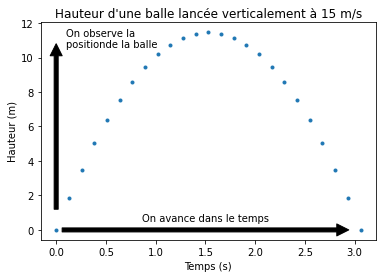

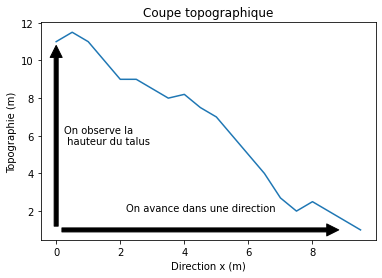

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# lancer d'une balle

v0 = 15 # m/s
g = -9.81 # m/s^2
t = np.linspace(0, -2*v0/g, 25)
y = v0*t + g/2*t**2

plt.plot(t, y, marker='.', ls='none')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur (m)')
plt.title(f'Hauteur d\'une balle lancée verticalement à {v0} m/s')
plt.annotate('', xy=(3, 0), xycoords='data', 
             xytext=(0, 0), textcoords='data',
             ha='center', va='center',
             arrowprops=dict(facecolor='black', shrink=0.02))
plt.annotate('On avance dans le temps', xy=(1.5, 0.5), ha='center')

plt.annotate('', xy=(0, 11), xytext=(0,1), 
             arrowprops=dict(facecolor='black', shrink=0.02))
plt.annotate('On observe la\npositionde la balle', xy=(0.1, 11.1), ha='left', va='center')


# profil dans la direction x de la topographie
plt.figure()
x = np.arange(0, 10, 0.5)
y = [11, 11.5, 11, 10, 9, 9, 8.5, 8, 8.2, 7.5, 7, 6, 5, 4, 2.7, 2, 2.5, 2, 1.5, 1]

plt.plot(x, y)
plt.xlabel('Direction x (m)')
plt.ylabel('Topographie (m)')
plt.title('Coupe topographique')

plt.annotate('', xy=(9, 1), xycoords='data', 
             xytext=(0, 1), textcoords='data',
             ha='center', va='center',
             arrowprops=dict(facecolor='black', shrink=0.02))
plt.annotate('On avance dans une direction', xy=(4.5, 2), ha='center')

plt.annotate('', xy=(0, 11), xytext=(0,1), 
             arrowprops=dict(facecolor='black', shrink=0.02))
plt.annotate('On observe la\n hauteur du talus', xy=(0.25, 6), ha='left', va='center')

Dans les deux cas, c'est la hauteur de quelque chose qui est observée, mais dans une dimension différente. Le premier cas, la hauteur est observée dans le temps uniquement, alors que dans le deuxième, c'est le long d'une direction.

Ce qui est similaire dans les deux cas, c'est que la dimension est unitaire. On a besoin que d'une seule coordonnée, c'est à dire un seul chiffre, pour exprimer la dimension de l'abscisse.

In [74]:
print('Dimension du temps')
print(np.shape(t))
print('Coordonnées du temps')
print(t)
print()
print('Dimension du profil x')
print(np.shape(x))
print('Coordonnées du profil x')
print(x)

Dimension du temps
(25,)
Coordonnées du temps
[0.         0.127421   0.254842   0.382263   0.509684   0.63710499
 0.76452599 0.89194699 1.01936799 1.14678899 1.27420999 1.40163099
 1.52905199 1.65647299 1.78389399 1.91131498 2.03873598 2.16615698
 2.29357798 2.42099898 2.54841998 2.67584098 2.80326198 2.93068298
 3.05810398]

Dimension du profil x
(20,)
Coordonnées du profil x
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]


`t`et `x`sont des vecteurs unidimensionnels: lorsqu'on appelle la fonction np.shape(), numpy nous les présente comme des vecteurs de forme (n,): ils ont donc n rangées et 0 colonnes? On peut se les imaginer comme des vecteurs colonnes.

# Représenter des données bi dimensionnelles

Maintenant, si on a des données qui se trouvent dans deux dimensions, comme des points sur une carte par exemple, il nous faut deux coordonnées, donc deux chiffres, pour représenter chacun des points.

Voyons voir avec un jeu de données que tu connais bien.



In [134]:
data = np.genfromtxt('sols.csv', skip_header=1, delimiter=',')

x = data[:, 0]
y = data[:, 1]

plt.scatter(x, y)
plt.xlabel('Coordonnées x (km)')
plt.ylabel('Coordonnées y (km)')

i = 88
x0, y0 = x[i], y[i]
plt.scatter(x0, y0, ec='k', fc='red', s=60, zorder=15)
plt.gca().set_xticks([x0], minor=True)
plt.gca().set_yticks([y0], minor=True)
plt.gca().set_xticklabels([x0], minor=True)
plt.gca().set_yticklabels([y0], minor=True)

plt.grid(which='minor', zorder=0, lw=1, c='k', ls='dashed')

Les deux jeux dimensions, x et y, sont exprimés par des vecteurs d'une dimension. Chaque point est représenté par une valeur de x et une valeur de y, comme le point rouge représenté sur le graphique.

In [130]:
# consulte la dimension de x
print(np.shape(x))

# consulte la dimension de y
print(np.shape(y))

(259,)
(259,)


Chaque point était représenté par une seule dimension, x et y.

Maintenant, si on avait à se représenter l'observation d'une certaine quantité pour chacun des points, nous aurions maintenant trois dimensions à observer. Il serait donc intéressant de visualiser l'information en trois dimensions également.

Penchons nous sur la visualisation plutôt que sur l'aspect programmatoire du processus: 

<IPython.core.display.Javascript object>


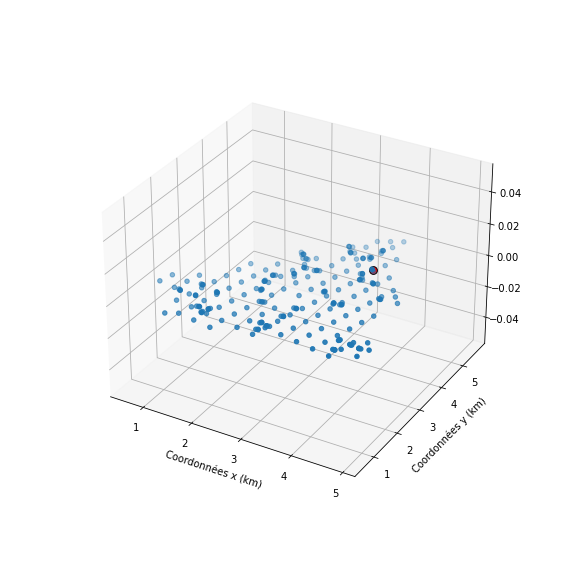

Text(0.5, 0, 'Coordonnées y (km)')

In [144]:
%matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y)
ax.scatter(x0, y0, ec='k', fc='red', s=60, zorder=15)
ax.set_xlabel('Coordonnées x (km)')
ax.set_ylabel('Coordonnées y (km)')

Ici, aucune dimension n'est représentée dans l'axe de la troisième dimension (z). En important un vecteur de plus du jeu de données `sols.csv`, on peut se figurer quelque chose:

<IPython.core.display.Javascript object>


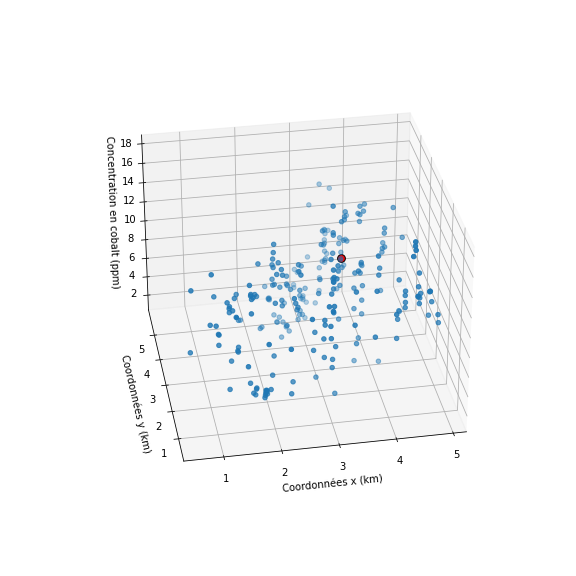

Text(0.5, 0, 'Concentration en cobalt (ppm)')

In [146]:
%matplotlib notebook

z = data[:, 5]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.scatter(x0, y0, z[i], ec='k', fc='red', s=60, zorder=15)
ax.set_xlabel('Coordonnées x (km)')
ax.set_ylabel('Coordonnées y (km)')
ax.set_zlabel('Concentration en cobalt (ppm)')

En science, l'idée d'interpoler des valeurs d'une observation à des endroits où il n'y en a pas est un problème très vieux. C'est l'objectif de ce chapitre ci; le krigeage est une puissante méthode d'interpolation.

Pour bien comprendre l'interpolation en deux dimensions, il est important de le comprendre en une dimension. Revenons à un exemple unidimensionnel, où nous avons des observations de y à quelques endroits le long d'un profil x. 

Text(0, 0.5, 'y')

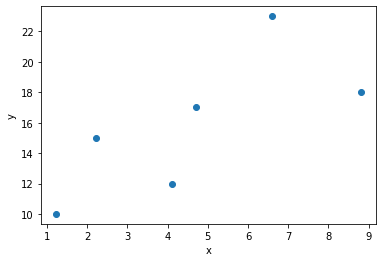

In [212]:
y = np.array([10, 15, 12, 17, 23, 18])
x = np.array([1.23, 2.2323, 4.112, 4.7, 6.6, 8.8])

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

Des scientifiques pourraient avoir besoin de prévoir la valeur de y pour une certaine valeur de x, disons 6.


Text(0, 0.5, 'y')

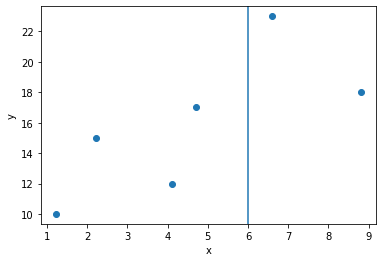

In [213]:
plt.scatter(x, y)
plt.axvline(6)
plt.xlabel('x')
plt.ylabel('y')

Comment prédire une bonne valeur de y? On se rappelle de notre ami la régression linéaire: 

SSR :  56.985619 
SST : 106.833333 
R^2 : 0.533407

----------------------------------------------------------

Résultat de la régression lineaire.

----------------------------------------------------------

Équation: y = 1.2111e+00 x + 1.0247e+01 

----------------------------------------------------------

Source de variation    df      SS              CM             Test-F 

----------------------------------------------------------

Régression linéaire    1     5.6986e+01     5.6986e+01        4.57 

Déviation (résiduel)  4     4.9848e+01     1.2462e+01      

Variation totale      5     1.0683e+02 

----------------------------------------------------------

Npts:  6

mu_x: 4.6124e+00 

mu_y: 1.5833e+01 

std_x: 2.5446e+00 

std_y: 4.2197e+00 

R^2:     0.5334 



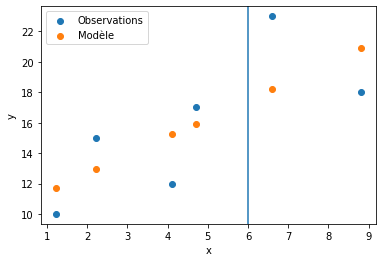

In [216]:
import ulgeostat as ul
M = ul.lin_reg(x, y)

ymod = M[0]*x + M[1]
plt.scatter(x, y, label='Observations')
plt.axvline(6)
plt.scatter(x, ymod, label='Modèle', c='tab:orange')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

La fonction `ul.lin_reg` ne fournit que la pente et l'ordonnée à l'origine de la droite des moindres carrées dans le vecteur `M`. Lorsqu'on affiche que les points calculés pour la droite, ils ne se trouvent que là où nous avons des observations. Essayons de comprendre en regardant de plus près les vecteurs `x`, `y` et `ymod`.

In [217]:
print('Dimension de x')
print(np.shape(x))

print('Dimension de y')
print(np.shape(y))

print('Dimension de ymod')
print(np.shape(ymod))

Dimension de x
(6,)
Dimension de y
(6,)
Dimension de ymod
(6,)


Ce ne sont que des vecteurs unidimensionnels avec 6 entrées. Comme nos prédictions se trouvent sur une droite, on peut l'afficher en appelant simplement la fonction `plot`:

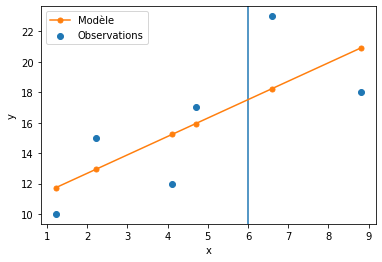

In [218]:
plt.scatter(x, y, label='Observations')
plt.axvline(6)
plt.plot(x, ymod, label='Modèle', c='tab:orange', marker='.', ms=10)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Bête non? Voyons voir un exemple où la position des points en x est plus importante:


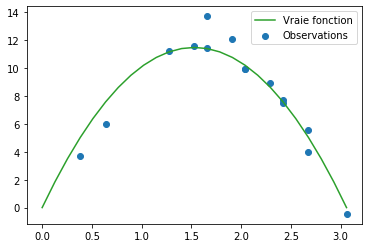

In [220]:
# Je génère une fonction y
v0 = 15 # m/s
g = -9.81 # m/s^2
t = np.linspace(0, -2*v0/g, 25)
y = v0*t + g/2*t**2 

# Je ne prends que quelques points de cette fonction originale auquel j'ajoute une erreur aléatoire
ii = [3, 5, 10, 12, 13, 13, 15, 16, 16, 18, 19, 19, 21, 21, 24]
tobs, yobs = t[ii], y[ii] + np.random.normal(loc=0, scale=1, size=len(ii))

plt.plot(t, y, c='tab:green', label='Vraie fonction')
plt.scatter(tobs, yobs, label='Observations')
plt.legend()

Dans ce cas de figure, nous ne connaissons pas la véritable fonction, la ligne verte. Afin de bien la retrouver, une droite ne fonctionnera pas. Une régression linéaire polynomiale pourrait nous permettre de retrouver la véritable parabole:

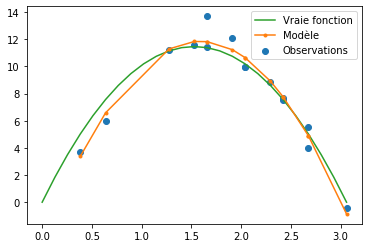

In [229]:
M = np.polyfit(tobs, yobs, deg=2)

ymod = M[0]*tobs**2 + M[1]*tobs + M[2]

plt.plot(t, y, c='tab:green', label='Vraie fonction')
plt.scatter(tobs, yobs, label='Observations')
plt.plot(tobs, ymod, label='Modèle', c='tab:orange', marker='.')
plt.legend()


Pourquoi notre modèle, la ligne orange, n'est-elle pas lisse comme la ligne verte? Elles sont toutes les deux calculés à partir d'un *maillage différent*. On peut facilement comprendre cela en consultant leurs valeurs:

In [233]:
print('Dimensions de tobs')
print(np.shape(tobs))

print('Valeurs de tobs')
print(tobs)

print('Valeurs de t')
print(np.shape(t))

print('Valeurs de t')
print(t)

Dimensions de tobs
(15,)
Valeurs de tobs
[0.382263   0.63710499 1.27420999 1.52905199 1.65647299 1.65647299
 1.91131498 2.03873598 2.03873598 2.29357798 2.42099898 2.42099898
 2.67584098 2.67584098 3.05810398]
Valeurs de t
(25,)
Valeurs de t
[0.         0.127421   0.254842   0.382263   0.509684   0.63710499
 0.76452599 0.89194699 1.01936799 1.14678899 1.27420999 1.40163099
 1.52905199 1.65647299 1.78389399 1.91131498 2.03873598 2.16615698
 2.29357798 2.42099898 2.54841998 2.67584098 2.80326198 2.93068298
 3.05810398]


``tobs`` n'a que 15 valeurs, toutes séparées d'une distance différente, alors que `t`, lui, en a 25 et sont toutes séparées d'une distance constante. 

Le nombre de points et leurs séparations définissent ce qu'on appelle le *maillage*. En évaluant notre parabole sur le même maillage que le modèle initial, on retrouve une courbe lisse: 

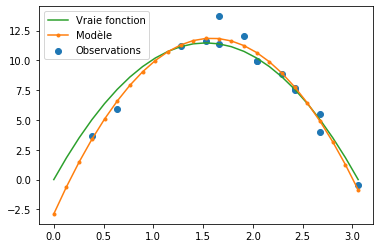

In [234]:
ymod = M[0]*t**2 + M[1]*t + M[2]


plt.plot(t, y, c='tab:green', label='Vraie fonction')
plt.scatter(tobs, yobs, label='Observations')
plt.plot(t, ymod, label='Modèle', c='tab:orange', marker='.')
plt.legend()

Peut-être cette prochaine figure illustrera mieux mon points:


Valeurs de t pour 3 points
[0.         1.52905199 3.05810398]

Valeurs de t pour 6 points
[0.         0.6116208  1.22324159 1.83486239 2.44648318 3.05810398]

Valeurs de t pour 9 points
[0.         0.382263   0.76452599 1.14678899 1.52905199 1.91131498
 2.29357798 2.67584098 3.05810398]



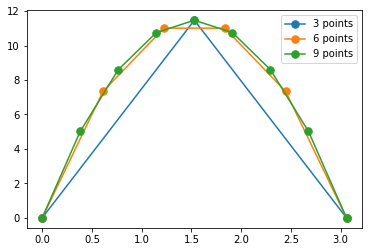

In [249]:
for n in range(3, 10, 3):
    
    t = np.linspace(0, -2*v0/g, n)
    y = v0*t + g/2*t**2
    plt.plot(t, y, marker='.', label=f'{n} points', ms=15)
    print('Valeurs de t pour ' + str(n) + ' points')
    print(t)
    print()
plt.legend()


Une courbe $f(x)$ est évaluée pour une infinité de nombre réels. En pratique, on ne peut la calculer que pour un nombre fini d'observation. Ici, je montre l'approximation de la courbe lorsqu'on utilise 3, puis 6 ou 9 points. La courbe commence a avoir de l'allure qu'avec 9 points.

# Revenons à notre exemple bi-dimensionnel

Pour interpoler une courbe en une dimension, nous avons besoin d'un grillage uni-dimensionnel, comme dans le cas précédent. Pour approximer un **plan** en **deux dimensions**, nous avons donc besoin d'un grillage bi-dimensionnel.

Laisse moi réafficher les points x et y de ``sols.csv`` pour m'expliquer.

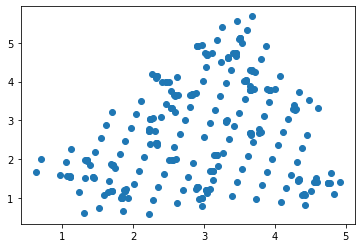

In [273]:
x, y = data[:, 0], data[:, 1]

plt.scatter(x, y)

# Avec la fonction np.linspace(a, b, N), on crée N points séparés de façon uniforme entre a et b.
N = 25
X = np.linspace(x.min(), x.max(), N)
Y = np.linspace(y.min(), y.max(), N)


Je crée donc vingt-cinq points pour x et y, du minimum au maximum de chacune des  dimensions.
Comment les afficher?

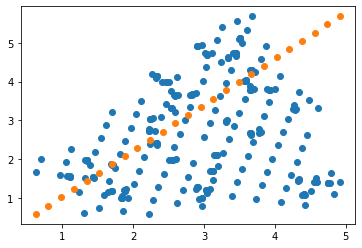

In [274]:
plt.scatter(x, y)
plt.scatter(X, Y)

Pas aussi simple... on a besoin d'une grile de points contenant toutes les combinaisons possibles de x et y. La fonction `np.meshgrid` nous fournit exactement ce dont on a besoin:, voyons voir:

In [275]:
print('Dimensions de X')
print(np.shape(X))
print('Contenu de X')
print(X)
print()
print('Dimensions de Y')
print(np.shape(Y))
print('Contenu de Y')
print(Y)
print()

xx, yy = np.meshgrid(X, Y)
print('Dimensions de xx')
print(np.shape(xx))
print('Contenu de xx')
print(xx)
print()
print('Dimensions de yy')
print(np.shape(yy))
print('Contenu de yy')
print(yy)
print()

Dimensions de X
(25,)
Contenu de X
[0.626      0.80491667 0.98383333 1.16275    1.34166667 1.52058333
 1.6995     1.87841667 2.05733333 2.23625    2.41516667 2.59408333
 2.773      2.95191667 3.13083333 3.30975    3.48866667 3.66758333
 3.8465     4.02541667 4.20433333 4.38325    4.56216667 4.74108333
 4.92      ]

Dimensions de Y
(25,)
Contenu de Y
[0.58       0.79291667 1.00583333 1.21875    1.43166667 1.64458333
 1.8575     2.07041667 2.28333333 2.49625    2.70916667 2.92208333
 3.135      3.34791667 3.56083333 3.77375    3.98666667 4.19958333
 4.4125     4.62541667 4.83833333 5.05125    5.26416667 5.47708333
 5.69      ]

Dimensions de xx
(25, 25)
Contenu de xx
[[0.626      0.80491667 0.98383333 1.16275    1.34166667 1.52058333
  1.6995     1.87841667 2.05733333 2.23625    2.41516667 2.59408333
  2.773      2.95191667 3.13083333 3.30975    3.48866667 3.66758333
  3.8465     4.02541667 4.20433333 4.38325    4.56216667 4.74108333
  4.92      ]
 [0.626      0.80491667 0.98383333 1.162

Les **matrices** ``xx`` et ``yy`` sont donc des matrices ``N,N``, et à eux deux comprennent donc toutes les combinaisons possibles de points pour notre maillage. Voyons voir de quoi ça a l'air:

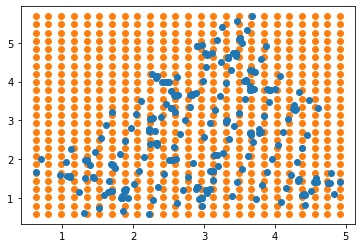

In [277]:
plt.scatter(x, y, zorder=10)
plt.scatter(xx, yy)

Et en trois dimensions, ça dit quoi?

<IPython.core.display.Javascript object>


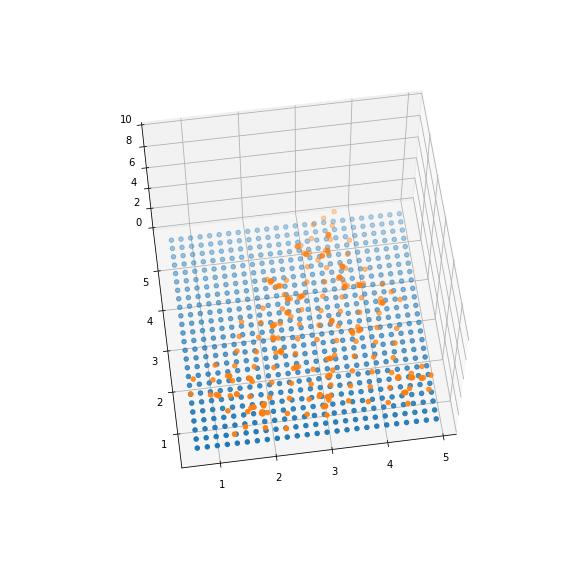

(0.0, 10.0)

In [287]:
%matplotlib notebook

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(xx, yy)
ax.scatter(x, y, 1)
ax.set_zlim(0, 10)

<IPython.core.display.Javascript object>


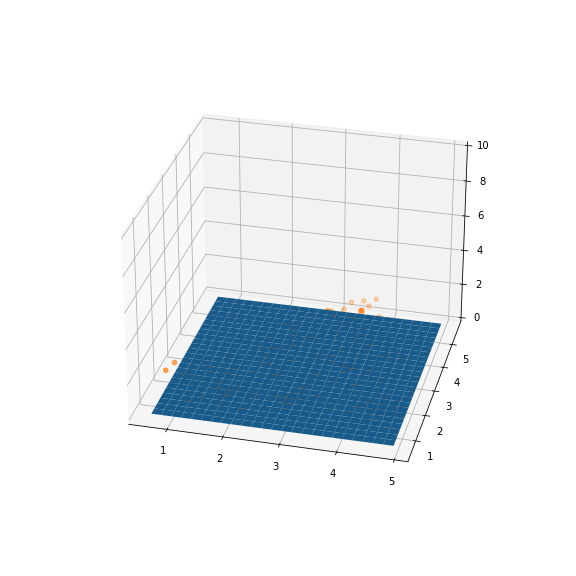

(0.0, 10.0)

In [289]:
%matplotlib notebook

# matplotlib nous permet d'afficher des surfaces également

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(xx, yy, xx*0)
ax.scatter(x, y, 1, c='tab:orange')
ax.set_zlim(0, 10)

Maintenant qu'on comprend la notion de maillage, on peut maintenant interpoler des surfaces pour nos points à l'aide de différentes techniques montrées dans le TP4.

<IPython.core.display.Javascript object>


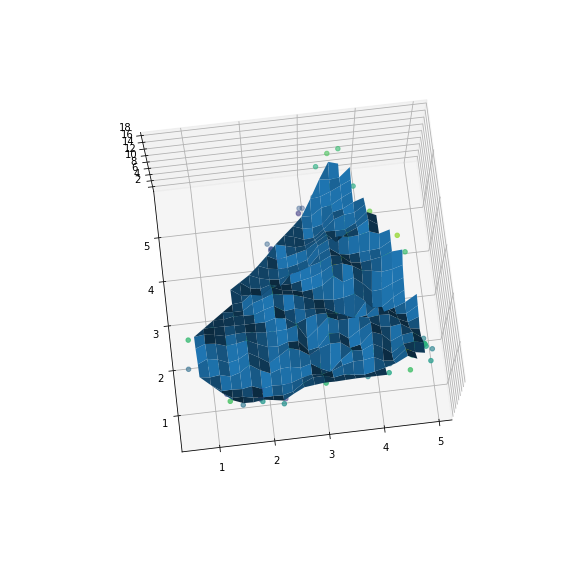

<ipython-input-323-7a459b8003aa>:13: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(xx, yy, zz)


In [323]:
%matplotlib notebook

from scipy.interpolate import griddata

z = data[:, 5]


fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=z)
zz = griddata(np.hstack((x[:, None], y[:, None])), z, np.hstack((xx.ravel()[:, None], yy.ravel()[:, None]))).reshape(xx.shape)
ax.plot_surface(xx, yy, zz)


<IPython.core.display.Javascript object>


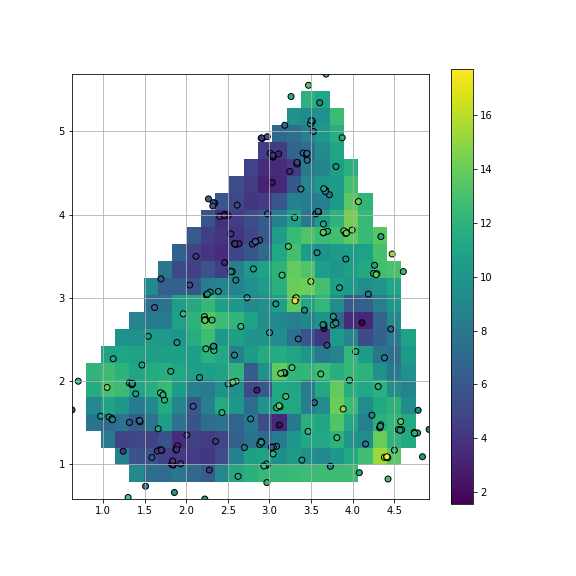

In [319]:
# On peut aussi s'intéresser à afficher cette interpolation sur un plan 2d et représenter l'interpolation avec de la couleur
fig = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=z, ec='k', vmin=z.min(), vmax=z.max())
plt.imshow(zz, extent=[X.min(), X.max(), Y.min(), Y.max()], origin='lower', vmin=z.min(), vmax=z.max())
plt.colorbar()
plt.grid()